In [1]:
# 7/22/21: https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

# end cite

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from utils_child import analysis

In [26]:


def display_scores(is_mean, is_success):
    
    stat_type = 'Mean' if is_mean else 'Standard deviation'
    metric_type = 'posterior negative surprisal' if is_success else 'posterior entropy'
    
    score_df, score_arr = analysis.organize_scores(is_success = is_success, is_mean = is_mean)
    display_words = [col for col in score_df.columns if 'child name' not in col]
    
    num_x_ticks = len(display_words)

    # For text annotations and color bar
    # 6/2 : https://www.pythonprogramming.in/heatmap-with-intermediate-color-text-annotations.html

    fig, ax = plt.subplots(figsize=(15, 15))

    plt.title(f'{stat_type} {metric_type} for cross-child analysis')

    im = ax.imshow(score_arr, cmap = "YlGnBu")
    fig.colorbar(im)

    textcolors = ["k", "w"] 

    #6/2 hide ticks: https://www.delftstack.com/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/
    #6/2 rotation: https://www.delftstack.com/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
    #6/2 xtick text: https://www.mathworks.com/help/matlab/creating_plots/change-tick-marks-and-tick-labels-of-graph-1.html

    plt.ylabel('Data child name')
    plt.xlabel('Prior child name')
    
    plt.xticks(range(num_x_ticks), display_words, rotation = 45)
    plt.yticks(range(num_x_ticks), display_words)
    
    threshold = 6

    for i in range(len(display_words)):
        for j in range(len(display_words)):
            this_val = round(score_arr[i][j].item(), 3)
            ax.text(j, i, this_val, ha="center", va="center", color=textcolors[this_val > threshold])

    # End taken code

    plt.show()

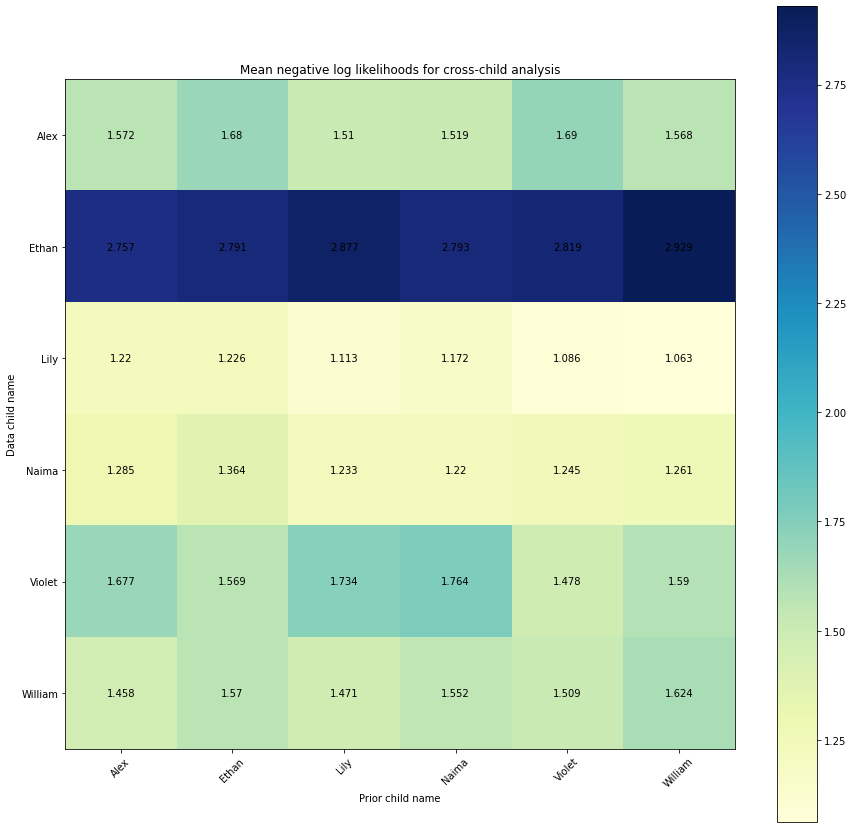

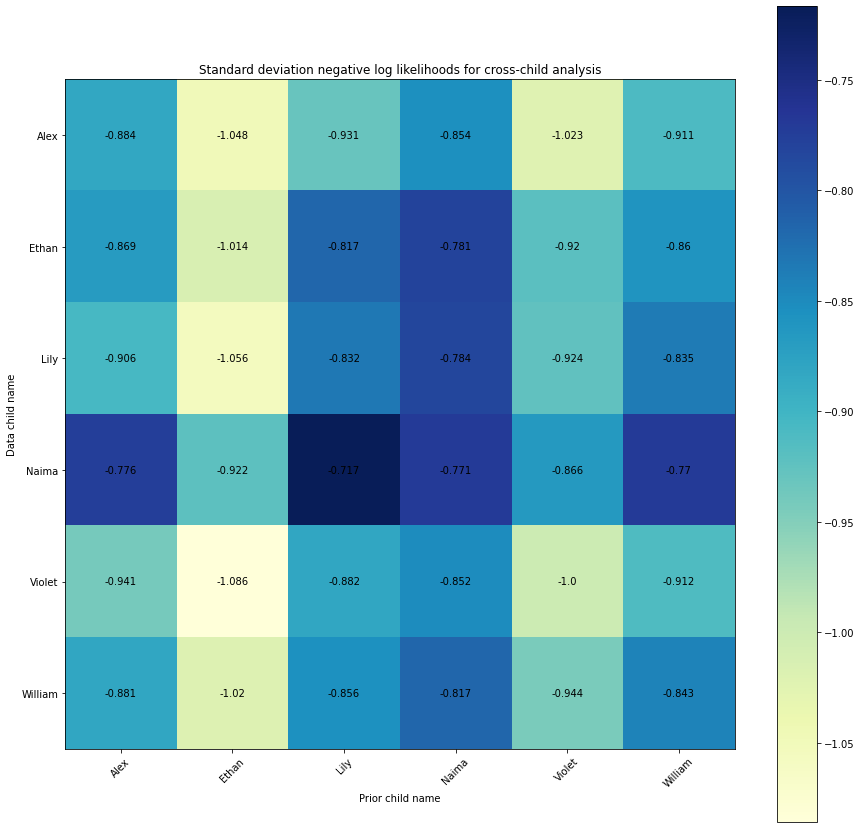

In [23]:

import importlib
importlib.reload(analysis)
 
display_scores(is_mean = True, is_success = True)
display_scores(is_mean = False, is_success = True)

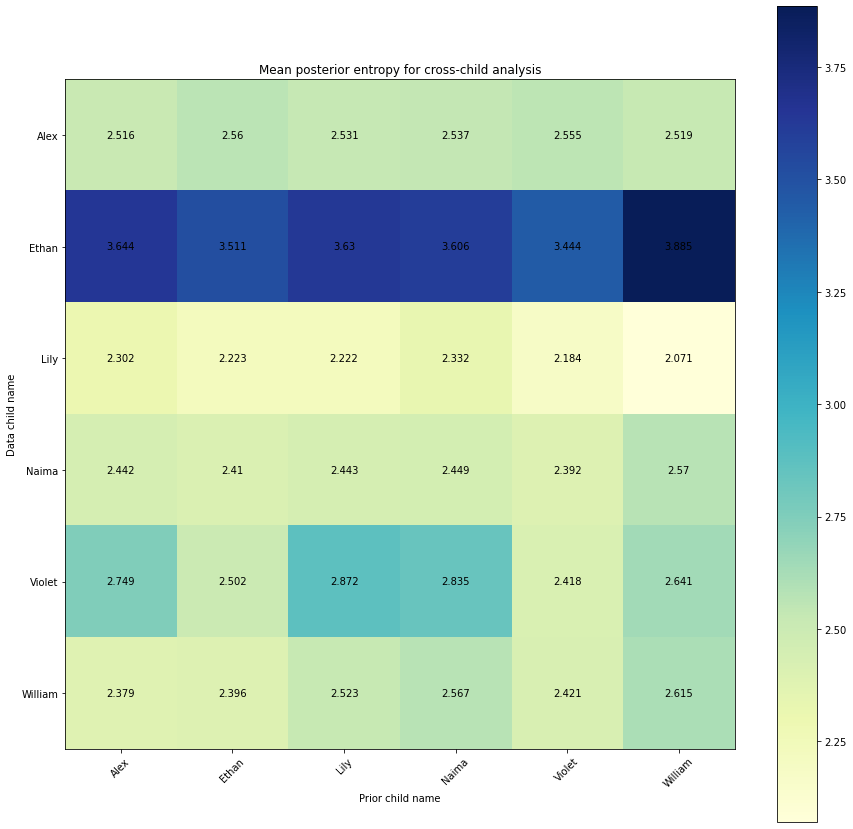

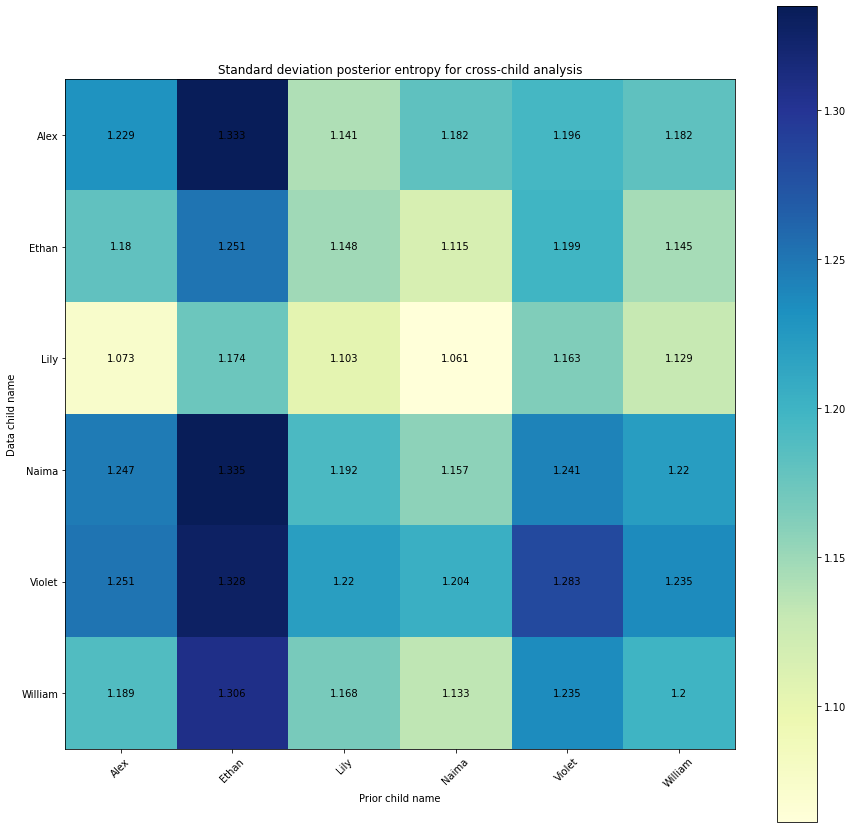

In [27]:
display_scores(is_mean = True, is_success = False)
display_scores(is_mean = False, is_success = False)